<a href="https://colab.research.google.com/github/lldckv/cs102/blob/homework06/homework06/%D0%94%D1%8C%D1%8F%D1%87%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9B%D0%B0%D0%B16_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ПОДГОТОВКА



In [187]:
install.packages("googledrive")
install.packages("httpuv")
library("googledrive")
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [188]:
#install.packages("R.utils")
#library("R.utils")
#library("httr")
#my_check <- function() {return(TRUE)}
#reassignInPackage("is_interactive", pkgName = "httr", my_check) 
#options(rlang_interactive=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [189]:
install.packages("dplyr")
library("dplyr")
install.packages("tidyr")
library('tidyr')
install.packages('gridExtra')
library(gridExtra)
install.packages("ggplot2")
library("ggplot2")
install.packages("corrplot")
library(corrplot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [ ]:
#1
music <- data.frame(read.csv('/music_genre.csv'))

In [190]:
#2
music_sample_full <- sample_n(music, 20000, replace = FALSE)
#3
if (any(duplicated(music_sample_full))) {
  music_sample_full <- music_sample_full[!duplicated(music_sample_full), ]
}
#4
cat(paste("Строк без артистов: ", nrow(music_sample_full[music_sample_full$artist_name == "empty_field", ])), "\n")
music_sample <- music_sample_full[!(music_sample_full$artist_name == "empty_field"),]
head(music_sample, 5)

Строк без артистов:  1004 


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,90062,Upchurch,Quit Lyin,54,0.256000,0.812,202733,0.702,0.000,A,0.2710,-6.087,Major,0.2440,161.05100000000002,4-Apr,0.516,Country
2,64875,Victor Wooten,What You Won't Do for Love,40,0.539000,0.608,-1,0.500,0.845,D,0.0853,-7.987,Minor,0.0358,99.76899999999999,4-Apr,0.420,Jazz
3,20587,Noah Kahan,Hurt Somebody,67,0.338000,0.633,-1,0.559,0.000,F#,0.2620,-5.135,Major,0.3130,114.98299999999999,4-Apr,0.473,Rock
4,50767,Lifehouse,Whatever It Takes,53,0.005710,0.439,207240,0.874,0.000,C,0.1760,-4.165,Major,0.0299,150.036,4-Apr,0.527,Rock
5,55070,Ice Cube,You Can Do It,52,0.000924,0.948,259333,0.863,0.000,C#,0.0565,-4.361,Minor,0.1700,99.902,4-Apr,0.872,Hip-Hop


# Задание 2


1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

         genre frequency
2  Alternative  9.871019
3        Anime  9.955251
4        Blues  9.976310
5    Classical  9.734141
6      Country 10.350092
7   Electronic  9.839431
8      Hip-Hop  9.871019
9         Jazz 10.071071
10         Rap 10.171098
11        Rock 10.155304


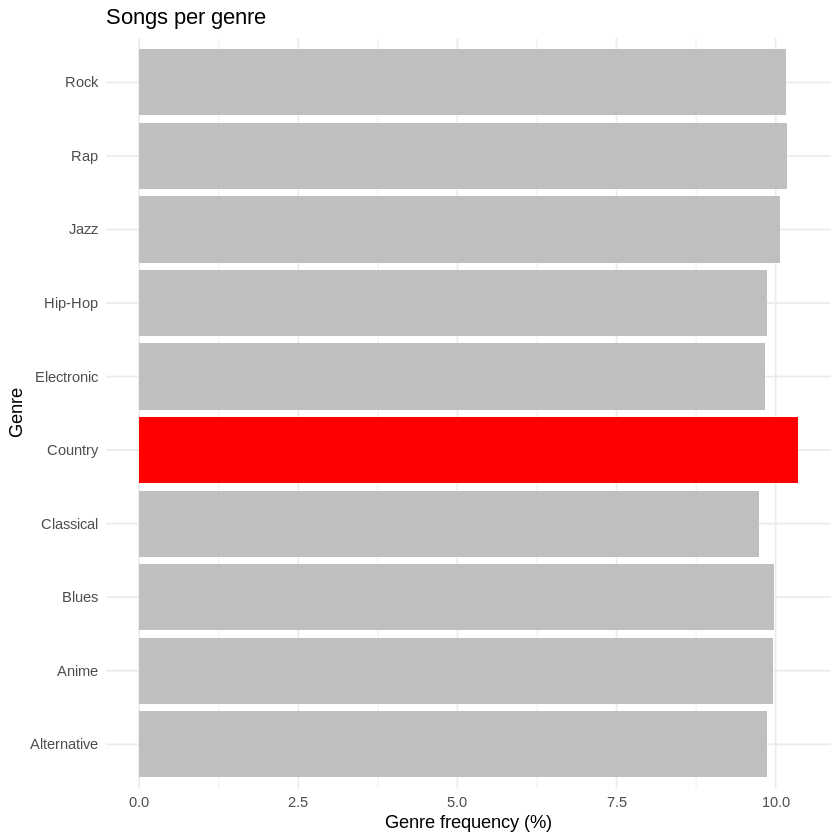

In [192]:
#1
genres_amount <- table(music_sample$music_genre)
genre_fraction <- 100 * genres_amount / nrow(music_sample)
genre_fraction_df <- data.frame(genre = names(genre_fraction), frequency = as.vector(genre_fraction))
genre_fraction_df <- genre_fraction_df[genre_fraction_df$genre != "", ]
print(genre_fraction_df)
#2
p1 <- ggplot(data = genre_fraction_df, aes(x = frequency, y = genre)) +
  geom_bar(stat = "identity", fill = "#bfbfbf") +
  labs(title = "Songs per genre", x = "Genre frequency (%)", y = "Genre") +
  theme_minimal()

tallest_genre <- genre_fraction_df[genre_fraction_df$frequency == max(genre_fraction_df$frequency), 1]

ggplot(data = genre_fraction_df, aes(x = frequency, y = genre)) +
  geom_bar(stat = "identity", fill = ifelse(genre_fraction_df$genre == tallest_genre, "red", "#bfbfbf")) +
  labs(title = "Songs per genre", x = "Genre frequency (%)", y = "Genre") +
  theme_minimal()

In [193]:
#3
genres <- music_sample$music_genre
genre_means <- tapply(music_sample$danceability, music_sample$music_genre, mean)
max_genre <- names(which.max(genre_means))
cat(paste("Название жанра с самым высоким показателем танцевальности:", max_genre))


Название жанра с самым высоким показателем танцевальности: Hip-Hop

In [194]:
#4
genres <- unique(genre_fraction_df$genre)
for (i in 1:length(genres)) {
  r <- music_sample[music_sample$music_genre == genres[i], "mode"]
  minor_cnt <- sum(r == "Minor", na.rm = TRUE)
  major_cnt <- sum(r == "Major", na.rm = TRUE)
  if (minor_cnt > major_cnt) {
    cat(paste(genres[i], ", Minor преобладает: ", minor_cnt, ">", major_cnt, "\n"))
  } else {
    cat(paste(genres[i], ", Major преобладает: ", minor_cnt, "<", major_cnt, "\n"))
  }
}

Alternative , Major преобладает:  694 < 1181 
Anime , Major преобладает:  730 < 1161 
Blues , Major преобладает:  535 < 1360 
Classical , Major преобладает:  646 < 1203 
Country , Major преобладает:  249 < 1717 
Electronic , Major преобладает:  880 < 989 
Hip-Hop , Major преобладает:  867 < 1008 
Jazz , Major преобладает:  936 < 977 
Rap , Major преобладает:  838 < 1094 
Rock , Major преобладает:  475 < 1454 


# Задание 3


1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.


Исполнитель с самым большим количеством треков: Nobuo Uematsu
Исполнитель с самым маленьким количеством треков: "Weird Al" Yankovic


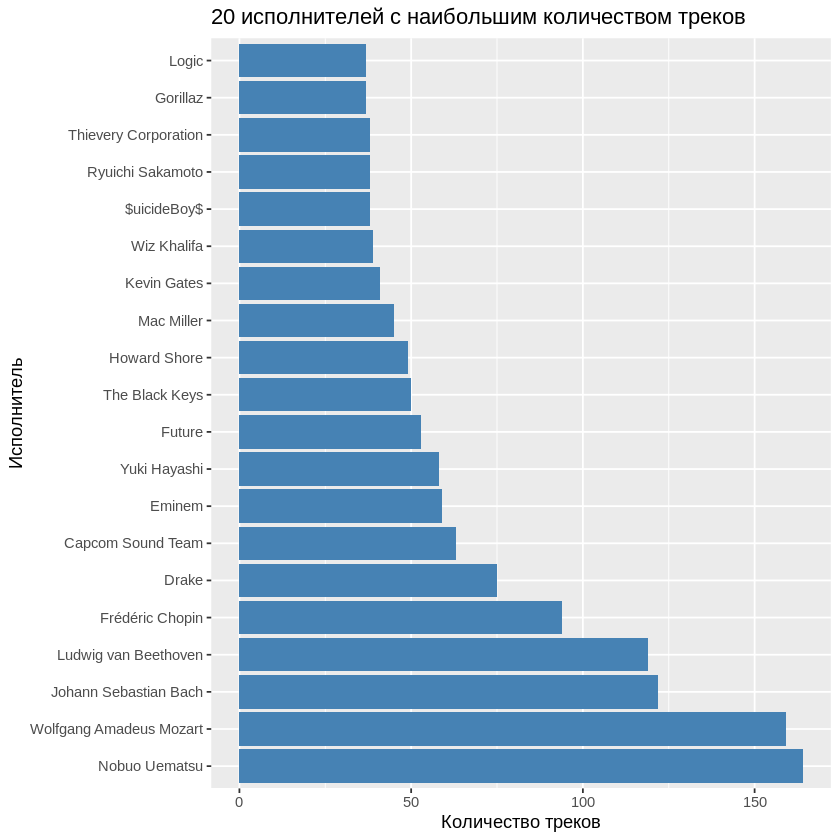

In [195]:
#1
tracks_count <- data.frame(table(music_sample[!music_sample$artist_name == "", ]$artist_name))
tracks_count <- tracks_count[order(tracks_count$Freq, decreasing = TRUE),]
cat(paste("Исполнитель с самым большим количеством треков:", tracks_count[which.max(tracks_count$Freq), "Var1"]))
cat("\n")
cat(paste("Исполнитель с самым маленьким количеством треков:", tracks_count[which.min(tracks_count$Freq), "Var1"]))
cat("\n")
#2
top_artists <- head(tracks_count, 20)
ggplot(top_artists, aes(x = reorder(Var1, -Freq), y = Freq)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(x = "Исполнитель", y = "Количество треков") +
  ggtitle("20 исполнителей с наибольшим количеством треков")

# Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

In [196]:
#1
is_numeric <- function(x) is.numeric(x)
numeric_cols <- sapply(music_sample, is_numeric)
cor(x = as.matrix(music_sample[c(names(music_sample)[numeric_cols])]), method = "pearson", use = "pairwise.complete.obs")

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.0000000000,-0.003996313,-0.004958184,-0.01102654,-0.002533618,0.01121282,-0.005937212,0.01030297,0.00383647,0.001828179,0.0001793131
popularity,-0.0039963133,1.000000000,-0.291321018,0.35401660,-0.079268384,0.21376845,-0.354325559,-0.03337010,0.31148072,0.228960849,0.1194951875
acousticness,-0.0049581840,-0.291321018,1.000000000,-0.34863929,0.063711134,-0.78941714,0.392387722,-0.10989174,-0.72852290,-0.166139811,-0.2698167722
danceability,-0.0110265391,0.354016599,-0.348639288,1.00000000,-0.159378497,0.25928651,-0.300528945,-0.05463503,0.38504129,0.283782234,0.4326246144
duration_ms,-0.0025336181,-0.079268384,0.063711134,-0.15937850,1.000000000,-0.07059061,0.131483690,0.01073638,-0.10586968,-0.092753098,-0.1295715977
energy,0.0112128156,0.213768455,-0.789417142,0.25928651,-0.070590611,1.00000000,-0.393080162,0.18804624,0.83718022,0.160715489,0.3955090120
instrumentalness,-0.0059372119,-0.354325559,0.392387722,-0.30052894,0.131483690,-0.39308016,1.000000000,-0.09565136,-0.53727574,-0.195488545,-0.2739099855
liveness,0.0103029677,-0.033370095,-0.109891740,-0.05463503,0.010736381,0.18804624,-0.095651359,1.00000000,0.13001665,0.121875479,0.0528313157
loudness,0.0038364701,0.311480720,-0.728522900,0.38504129,-0.105869681,0.83718022,-0.537275744,0.13001665,1.00000000,0.167537835,0.3378819856
speechiness,0.0018281789,0.228960849,-0.166139811,0.28378223,-0.092753098,0.16071549,-0.195488545,0.12187548,0.16753784,1.000000000,0.0582540581


In [197]:
#2
music_sample$track_name_length <- nchar(music_sample$track_name)
cor(music_sample$popularity, music_sample$track_name_length, method = "pearson", use = "pairwise.complete.obs")
music_sample <- subset(music_sample, select = -track_name_length)

[1] -0.2153896

# Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?


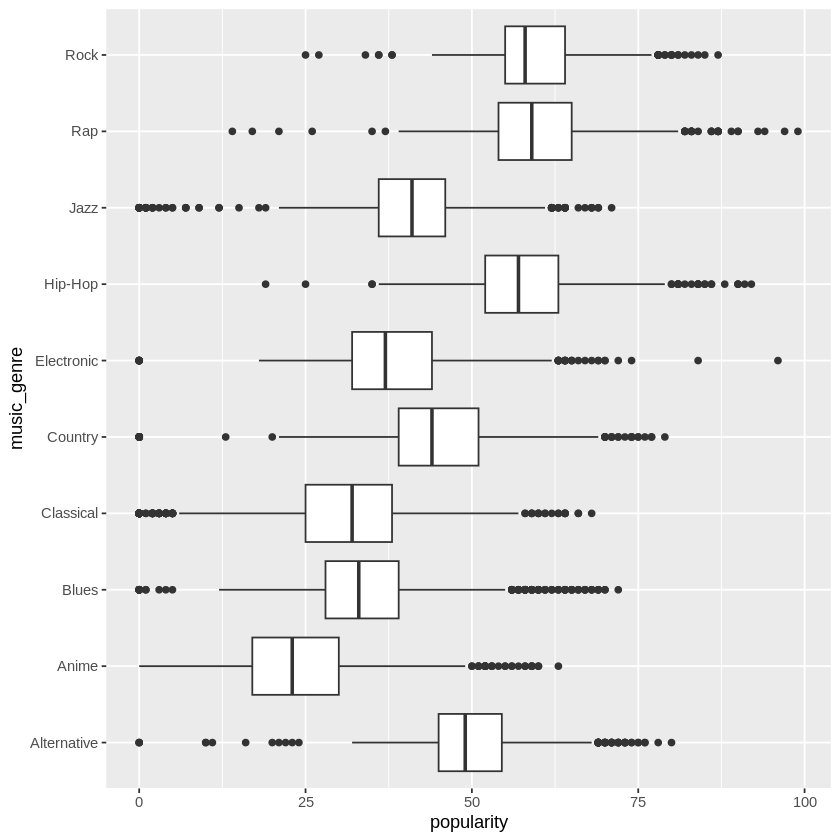

In [198]:
music_sample_g=music_sample[music_sample$music_genre != "", ]
ggplot(music_sample_g, aes(x = popularity, y = music_genre)) + 
  geom_boxplot()

# Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

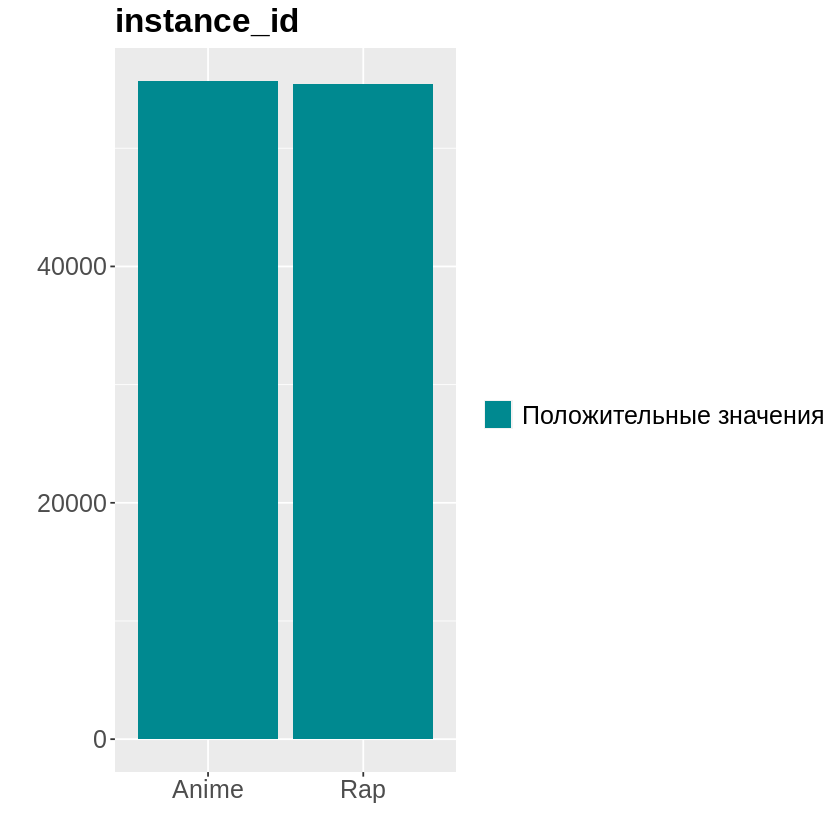

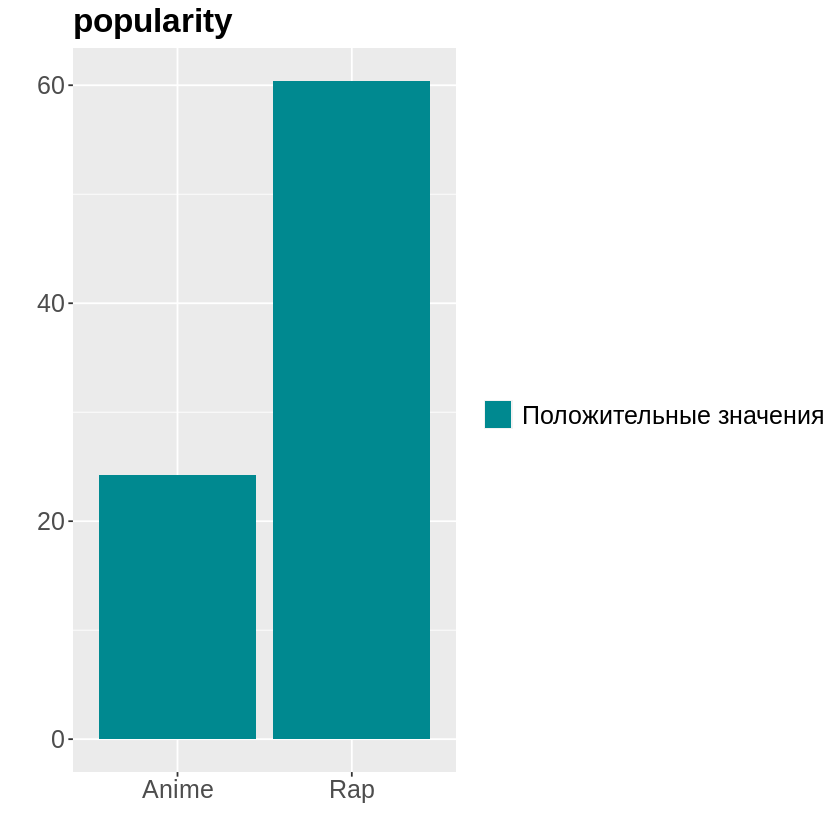

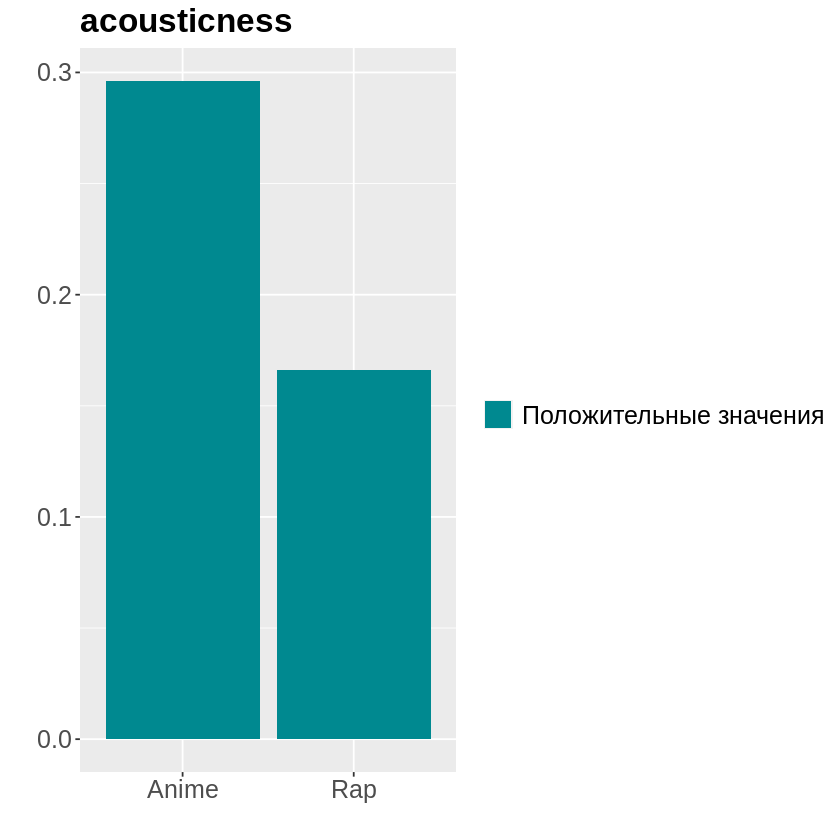

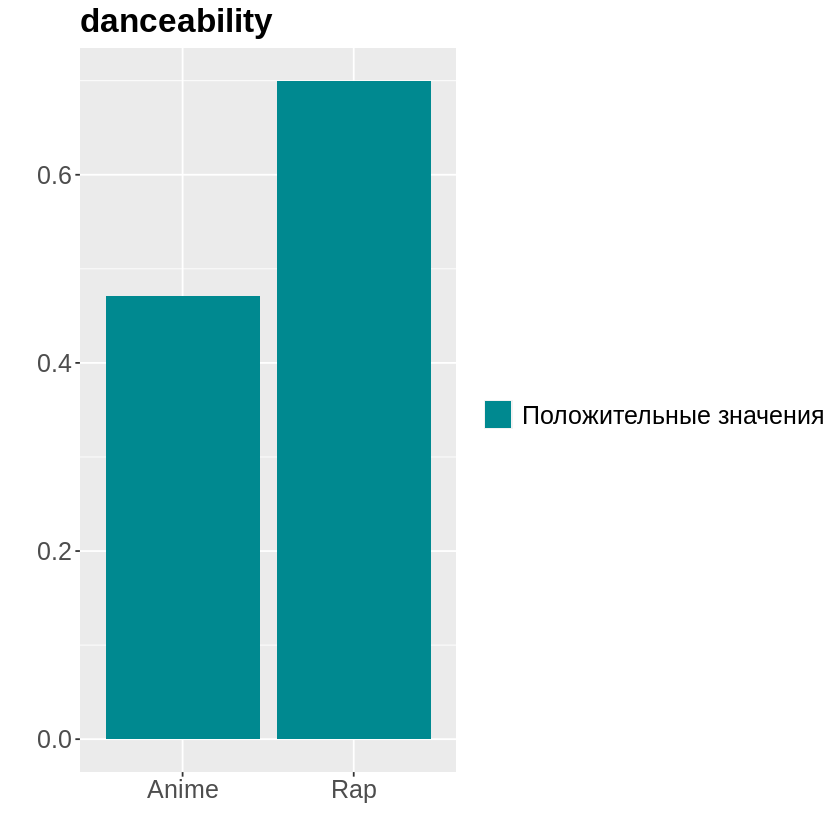

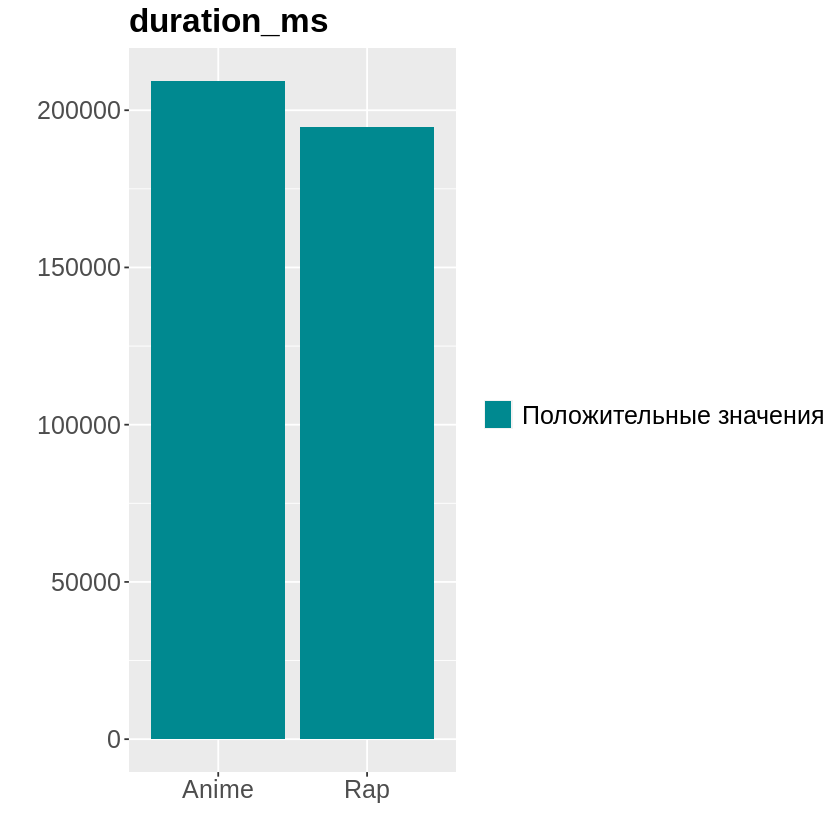

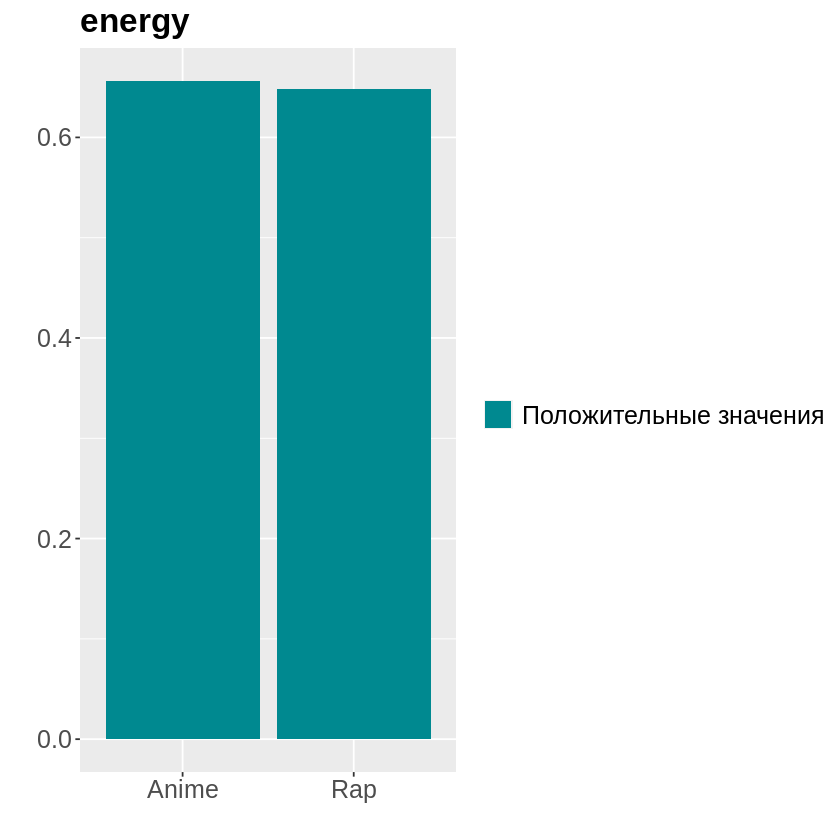

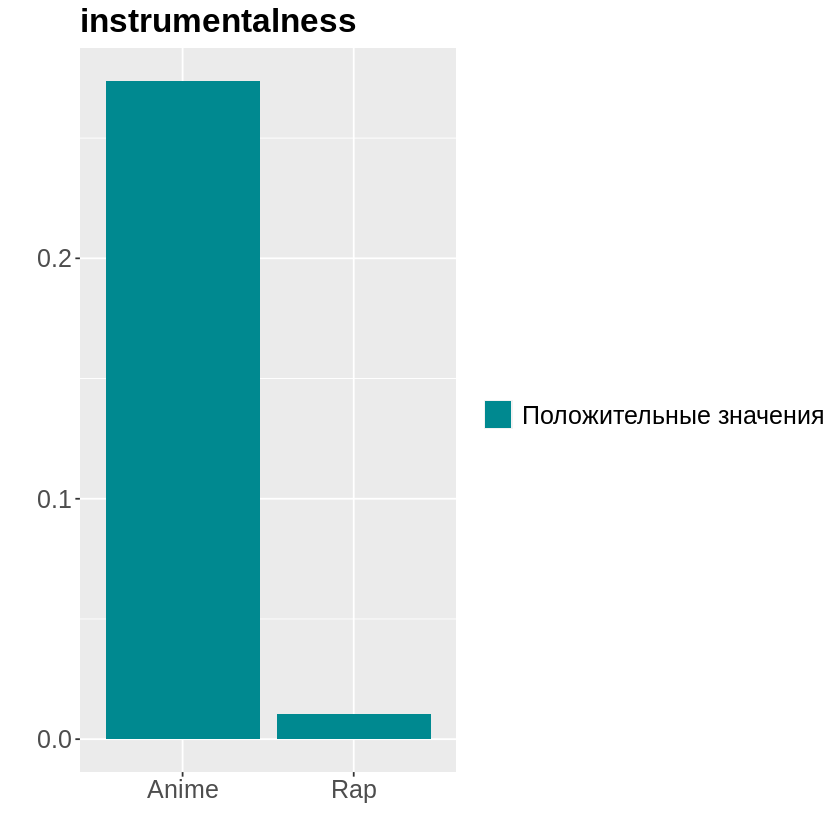

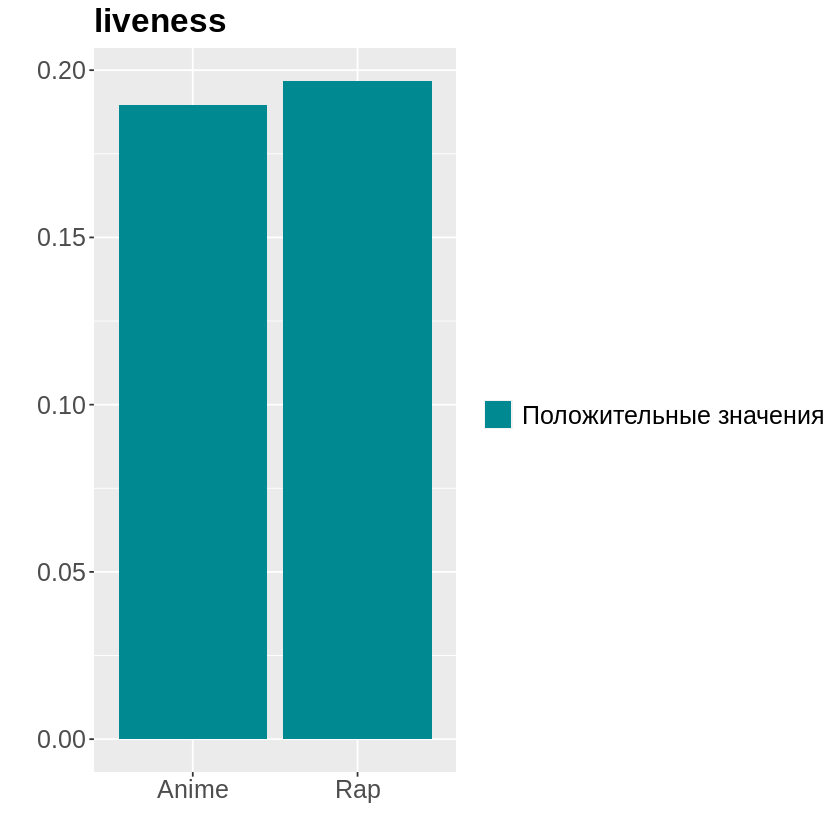

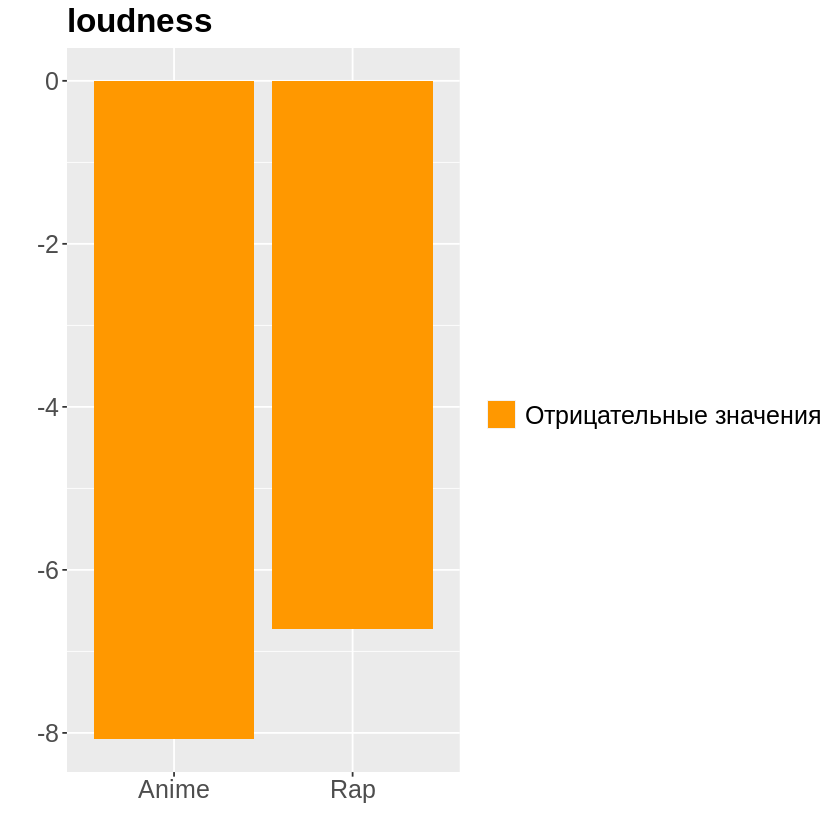

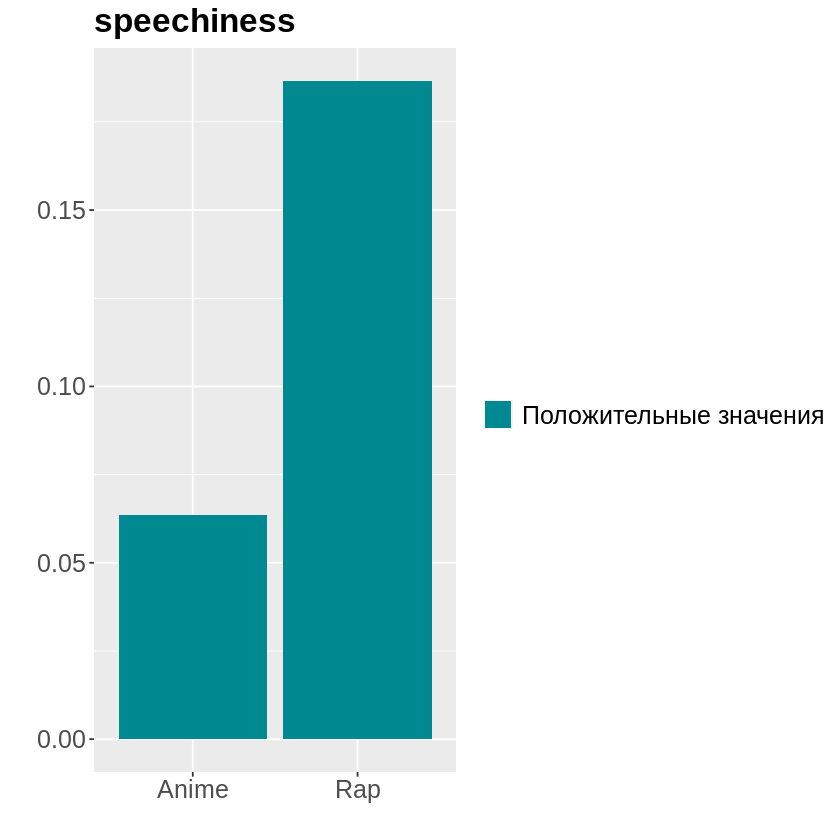

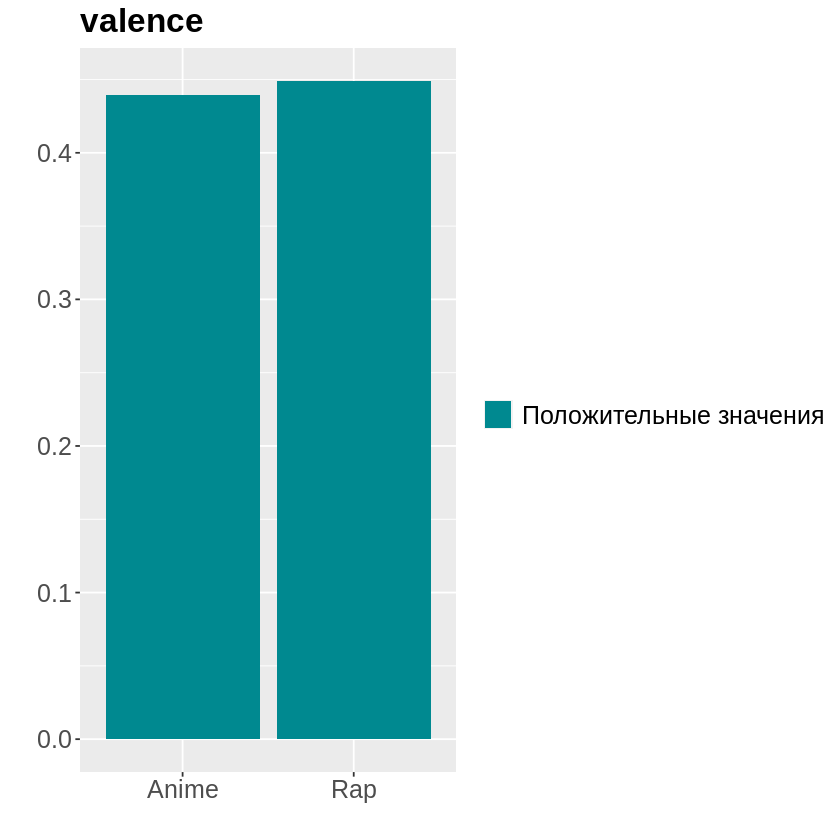

In [211]:
mp_genre <- names(which.max(tapply(music_sample$popularity, music_sample$music_genre, mean)))
lp_genre <- names(which.min(tapply(music_sample$popularity, music_sample$music_genre, mean)))
means_by_genre <- music_sample %>%
  group_by(music_genre) %>%
  summarise(across(where(is.numeric), mean)) %>%
  pivot_longer(cols = -music_genre)

means_by_genre <- means_by_genre %>%
  filter(music_genre == mp_genre | music_genre == lp_genre)

color_scale <- scale_fill_manual(
  values = c("#008990", "#FF9800"),
  breaks = c(FALSE, TRUE),
  labels = c("Положительные значения", "Отрицательные значения")
)

for (col_name in unique(means_by_genre$name)) {
  col_data <- subset(means_by_genre, name == col_name)

  g <- ggplot(col_data, aes(x = music_genre, y = value, fill = value < 0)) +
    geom_col(position = "dodge") +
    color_scale +
    labs(
      title = col_name,
      x = "",
      y = ""
    ) +
    theme(
      axis.text.x = element_text(size = 15),
      axis.text = element_text(size=15),
      axis.title = element_text(size=15),
      legend.title = element_blank(),
      legend.text = element_text(size = 15),
      plot.title = element_text(face = "bold", size = 20)
    ) +
    guides(fill = guide_legend(reverse = TRUE))
  print(g)
}

# Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме покажите численное соотношение треков разной длительности.

In [205]:
#1
music_sample$длительность_трека <- ifelse(music_sample$duration_ms > 300000, "длинная", ifelse(music_sample$duration_ms > 180000 & music_sample$duration_ms <= 300000, "средняя", "короткая"))
head(music_sample, 10)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,90062,Upchurch,Quit Lyin,54,0.256000,0.812,202733,0.702,0.00e+00,A,0.2710,-6.087,Major,0.2440,161.05100000000002,4-Apr,0.516,Country,средняя
2,64875,Victor Wooten,What You Won't Do for Love,40,0.539000,0.608,-1,0.500,8.45e-01,D,0.0853,-7.987,Minor,0.0358,99.76899999999999,4-Apr,0.420,Jazz,короткая
3,20587,Noah Kahan,Hurt Somebody,67,0.338000,0.633,-1,0.559,0.00e+00,F#,0.2620,-5.135,Major,0.3130,114.98299999999999,4-Apr,0.473,Rock,короткая
4,50767,Lifehouse,Whatever It Takes,53,0.005710,0.439,207240,0.874,0.00e+00,C,0.1760,-4.165,Major,0.0299,150.036,4-Apr,0.527,Rock,средняя
5,55070,Ice Cube,You Can Do It,52,0.000924,0.948,259333,0.863,0.00e+00,C#,0.0565,-4.361,Minor,0.1700,99.902,4-Apr,0.872,Hip-Hop,средняя
6,79139,Ambrosia,Biggest Part of Me,64,0.238000,0.498,324040,0.723,0.00e+00,A#,0.3530,-8.053,Major,0.0500,153.227,4-Apr,0.882,Rock,длинная
7,76008,All Them Witches,Alabaster,36,0.135000,0.513,417533,0.887,2.07e-03,C,0.0997,-6.569,Minor,0.0566,117.48100000000001,4-Apr,0.512,Blues,длинная
8,88243,Portishead,The Rip,48,0.937000,0.476,270947,0.477,4.05e-01,A,0.0989,-9.478,Minor,0.0316,74.957,4-Apr,0.231,Electronic,средняя
9,43253,Chris Young,Center Of My World,43,0.192000,0.668,213987,0.806,8.52e-06,E,0.0620,-3.405,Major,0.0293,112.99700000000001,4-Apr,0.730,Country,средняя


Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


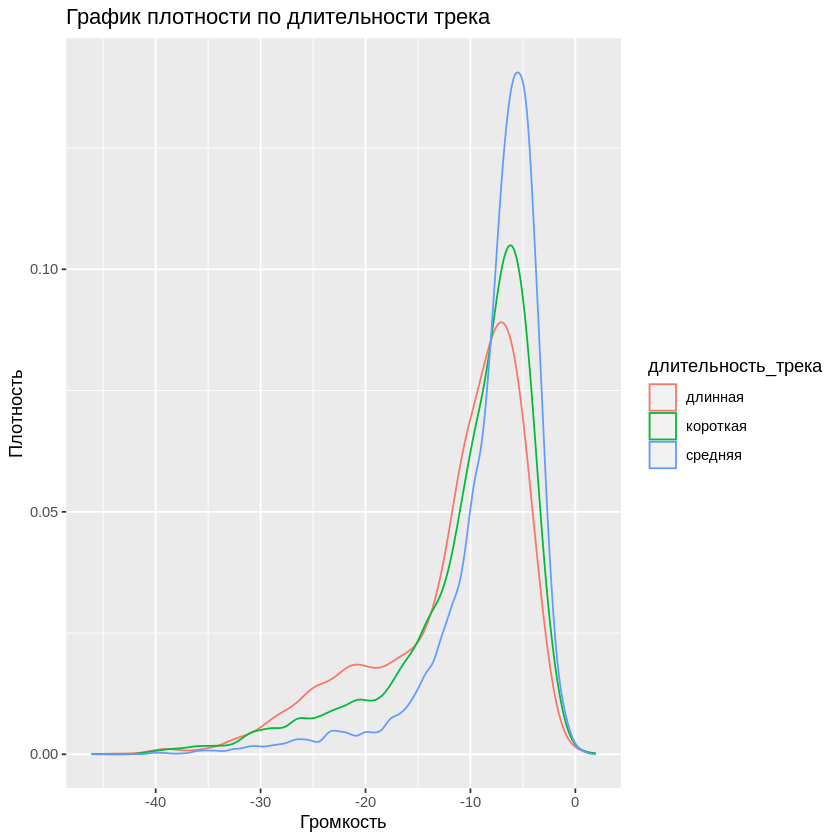

In [209]:
#2
ggplot(music_sample, aes(x = loudness, color = длительность_трека)) + 
    geom_density()  +
    xlab("Громкость") + 
    ylab("Плотность") + 
    ggtitle("График плотности по длительности трека")

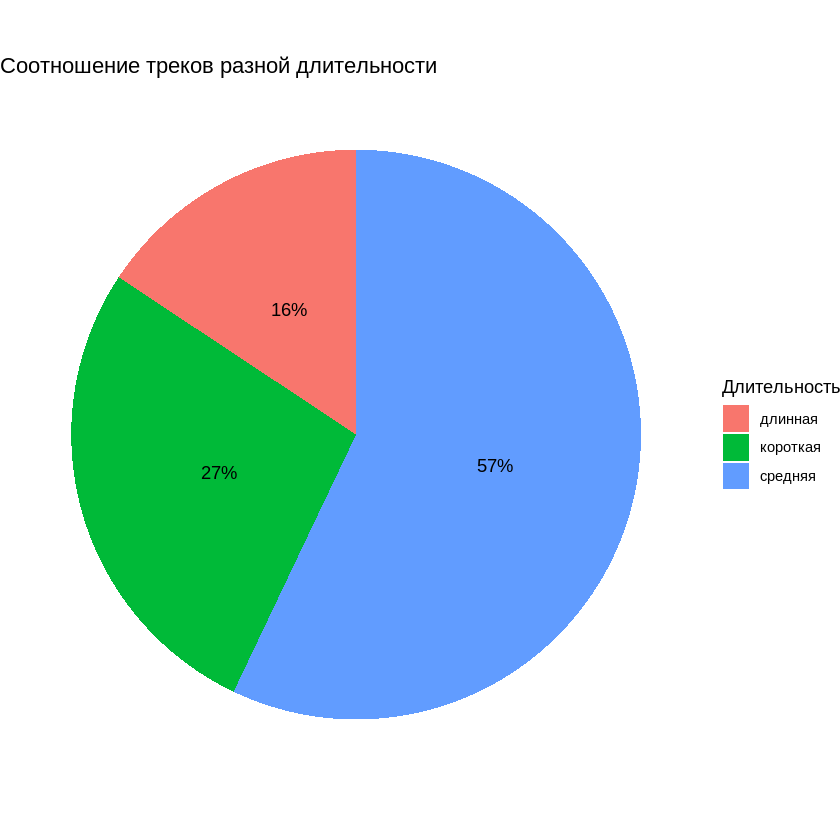

In [185]:
#3
duration_counts <- table(music_sample$длительность_трека)
df <- data.frame(duration=names(duration_counts), counts=as.numeric(duration_counts))
ggplot(df, aes(x="", y=counts, fill=duration)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0) +
  geom_text(aes(label = paste0(round(counts/sum(counts)*100),"%")), position = position_stack(vjust = 0.5)) +
  theme_void() +
  labs(title="Cоотношение треков разной длительности",
       fill="Длительность")